# Neuronetwork analysis: graphs and topology

Этот ноутбук посвящен введению в анализ сетевых структур, графовыми и топологическими методами. Основные задачи: обзор существующих библиотек на python и базовых методов анализа сетевых данных.

### Онучин Арсений 
Факультет Психологии МГУ 

Моя почта: arseniyonuchin04.09.97@gmail.com. 

## Сетевые структуры

Сети при желании можно найти где угодно: любая форма взаимоотношений между объектами может быть представлена в виде сетевой структуры. В каких случаях это действительно осмысленно? Тогда, когда нас интересует "структура", образованная объектами и связями между ними в какой-то конкретной ситуации. Если бы нас интересовали свойства конкретной связи или конкретного объекта, то такого типа модель не была бы сильно осмысленной. Именно поэтому сетевые методы часто применяются для анализа общей структуры таких систем, как системы социальные, биологические, придумайте своё. Почему? Так ведь связи между ними, да и сами составляющие таких систем крайне вариативны. Это вам не звезды на небе, которые, конечно, тоже обладают некоторой интересной геометрией, но геометрией эволюционирующей очень медленно и неохотно, чего не скажешь о структуре социальных сообществ или группах нейронов. 

### Общая терминология 

В случае с графами используется достаточно просто математический формализм: есть множество вершин V и множество рёбер между вершинами E. По факту, каждое ребро -- просто пара вершин, поэтому всю запись можно свести к описанию в терминах вершин и их пар. 

Поэтому в контексте графового анализа мы будем понимать под сетью некоторый граф, который определяется как пара двух множеств: вершин и ребер между ними G := (V, E). Это самый простой из формальных объектов, в нем отсутствует даже информация о направлении связей! Давайте быстренько построим такой граф посредством библиотеки [NetworkX](https://networkx.org/). 


In [2]:
#!pip install networkx
#Уберите символ # со строчки выше, если библиотека networkx у вас не установлена и вызовите данную ячейку в блокноте

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

G=nx.Graph() # пустой граф (как и с большинством математических структур, есть пример пустой структуры -- граф без вершин)
G.add_node(1) 
G.add_nodes_from([2,3,4,5,6,7])

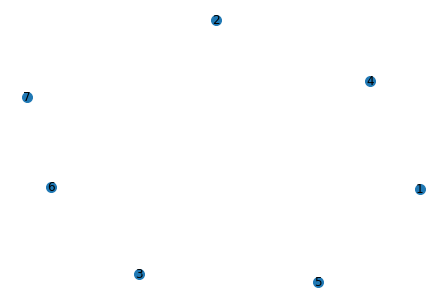

In [3]:
nx.draw(G,node_size=100,with_labels=True) 
#Это мы добавили вершины в граф, пока что там нет рёбер и он выглядит как-то так: 

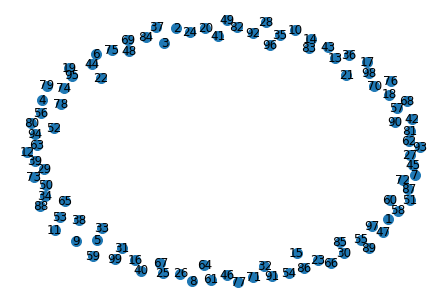

In [4]:
#функция arange удобна для создания массива чисел итеративным методом 
#первый параметр -- начало, второй -- конец, третий -- шаг
#то есть, вершины в граф можно добавлять сразу из списка 

nodes_list = np.arange(7,100,1)
G.add_nodes_from(nodes_list)
nx.draw(G,node_size=100,with_labels=True)

В функции отрисовки есть много разных параметров, которые можно указать. Здесь использован только основной аргумент функции -- сам граф G и два параметра: размер вершин на рисунке и наличие на них лейблов.

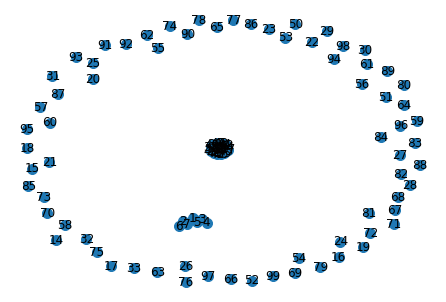

In [5]:
#Добавим рёбра в граф (пары вершин) и нарисуем то, что получилось

G.add_edge(1,2)
G.add_edges_from([(1,2),(1,3),(1,5),(4,5),(3,4),(3,5),(6,7),(7,5),(7,2),(6,2)])
edges_list1 = np.arange(8,14,1)
edges_list2 = np.arange(34,50,1)
edges_list = [[a,b] for a in edges_list1 for b in edges_list2 if a != b]

G.add_edges_from(edges_list)
#И нарисуем его снова

nx.draw(G,node_size=100,with_labels=True) 

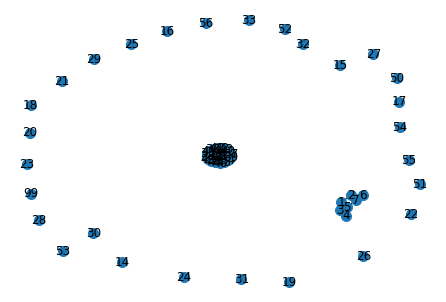

In [6]:
nodes_for_removing = nodes_list[50:-1]
G.remove_nodes_from(nodes_for_removing)
nx.draw(G,node_size=100,with_labels=True) 

Если весов на ребрах нет, а фиксировать какое-то расположение графа на плоскости хочется, то можно рассчитать координаты вершин с помощью встроенных функций layout. 

Возьмем spring_layout, в этом методе для вычисления координат вершин в пространстве в них помещаются заряды, а ребра заменяют на "пружинки". Равновесное состояние такое системы зарядов определяет координатное представление сети. 

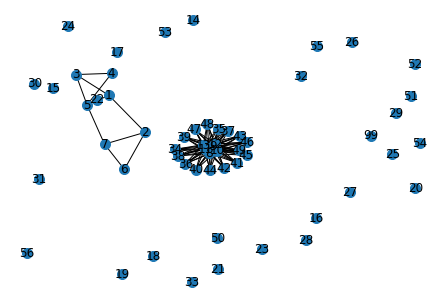

In [7]:
spring=nx.spring_layout(G,iterations=10)
nx.draw(G,spring,node_size=100,with_labels=True)

Можно нарисовать граф по иному шаблону, расположив вершины по окружности. 

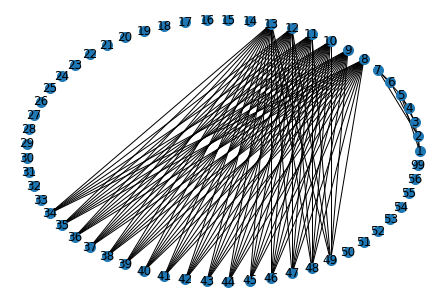

In [8]:
circle_G = nx.drawing.layout.circular_layout(G)
nx.draw(G,circle_G,node_size=100,with_labels=True)

Или, наоборот, рандомизировать расположение вершин, если они слипаются в один класс. Другие варианты можно посмотреть в документации библиотеки по [ссылке](https://networkx.org/documentation/stable/reference/drawing.html). 

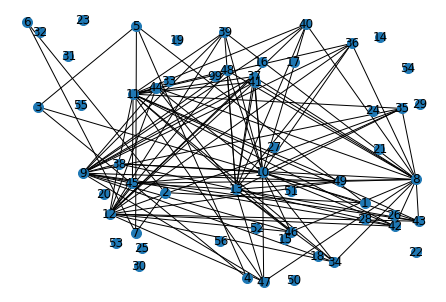

In [9]:
random_G = nx.drawing.layout.random_layout(G)
nx.draw(G,random_G,node_size=100,with_labels=True)

Если бы у нас были некоторые "веса" на рёбрах, например, расстояния между вершинами-городами, то структура бы имела однозначную метрическую реализацию (с точностью до изометрии). Пока забудем про это, но вернемся чуть позже. 

Наиболее удобной формой представления графа является матрица смежности (adjacency matrix). Это двумерный квадратный массив, где строки и столбцы -- вершины, а в ячейках на пересечениях стоят 0 или 1, которые говорят о наличии или отсутствии ребра между соответствующими вершинами. 


Если граф ненаправленный, то матрица получится симметричной (относительно диагонали, так как ребро есть как в одну, так и в другую сторону), если граф направленный, то и матрица будет несимметричной. Если есть петли (связь вершины с самойсобой), то по диагонали матрицы тоже могут находиться значения. Иногда в ячейках не 1/0, а вес связи, например, число дорог между двумя городами. 

По уже построенному графу, через список его ребер и вершин, можно восстановить матрицу смежности. 

In [10]:
A=nx.adjacency_matrix(G).todense()
print(A)

[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Как мы видим, петель нет (нули на диагонали), граф невзвешенный (никаких значений кроме 1/0 нет), граф ненаправленный (матрица симметричная). 

Можно нарисовать матрицу картинкой!

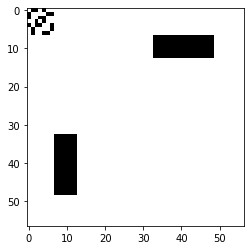

In [11]:
plt.imshow(A,cmap='binary')

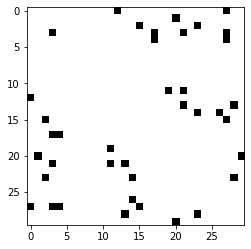

In [12]:
# Можно ребра сгенерировать рандомно и посмотреть на матрицу смежности случайного графа
random_edges = np.random.randint(30,size=(20,2))
nodes_new = np.arange(0,30,1)
G_rand = nx.Graph()
G_rand.add_nodes_from(nodes_new)
G_rand.add_edges_from(random_edges)

B = nx.adjacency_matrix(G_rand).todense()
plt.imshow(B,cmap='binary')

### Направленные графы

Вполне актуальная задача в нейронауках -- построение направленных графовых структур. Такой объект в библиотеке NetworkX задается через DiGraph().

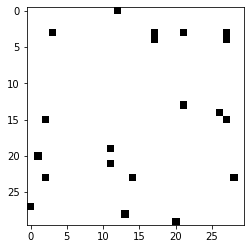

In [13]:
Di_G = nx.DiGraph()
Di_G.add_nodes_from(nodes_new)
Di_G.add_edges_from(random_edges)
Di_M = nx.adjacency_matrix(Di_G).todense()
plt.imshow(Di_M, cmap='binary')

Как мы видим, матрица несимметрична относительно диагонала, а значит, граф направленный. 

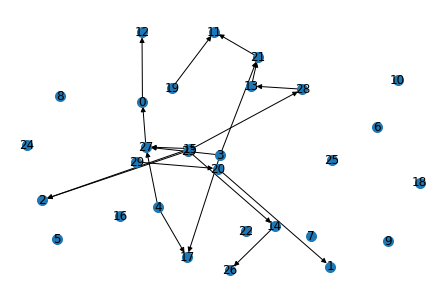

In [14]:
spring=nx.spring_layout(Di_G,iterations=10)

nx.draw(Di_G,spring,node_size=100,with_labels=True)

## Графовое представление датасета


Теперь, когда мы научились создавать графовые объекты и все такое, можно попробовать сделать это из реальных данных. 

Загрузим модельные данные [отсюда](https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_nodelist.csv) и [отсюда](https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_edgelist.csv). В первом файле хранятся вершины графа, во втором его рёбра. Это пример социального графа, где в первом файле всякие данные по людям, а во втором пары имен, говорящие о наличии социального контакта между ними. Ниже приведены несколько первых строчек файла вершин. 

Мы будем считать, что если один человек знает другого, то это верно и в обратную сторону. То есть, наш граф будет ненаправленным. Пример первых строк второго файла с рёбрами графа ниже. 

Откроем файлы посредством библиотеки csv. Можно было бы использовать и pandas, там тоже есть модуль для открытия csv файлов. 

In [15]:
import csv
from operator import itemgetter

В ' ' необходимо указать путь до файла на своём компьютере. После того, как вы скачали файл, он находится в конкретной директории и к нему есть определенный путь, по которому его можно найти! Обратите внимание, что при копировании пути до файла из его описания вместо символов / встречаются \, а для корректной работы функции нужны /. 

In [16]:
with open('D:/Библиотека/Data/data/Для ноутбука на конкурс/quakers_nodelist.csv', 'r') as nodecsv: # Открытие файла
    nodereader = csv.reader(nodecsv) # Чтение файла csv
    # Преобразует данные в питоновский список, начиная с первой строки (нулевая строка с заголовком исключается)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Выделение списка, состоящего только из имен вершин -- нулевой столбец

with open('D:/Библиотека/Data/data/Для ноутбука на конкурс/quakers_edgelist.csv', 'r') as edgecsv: # Открытие второго файла
    edgereader = csv.reader(edgecsv) # Его чтение
    edges = [tuple(e) for e in edgereader][1:] # Преобразование данных в tuple

Посмотреть число вершин и ребер можно и до построения графа по данным методами библиотеки NetworkX. 

In [17]:
print(len(node_names))
print(len(edges))

119
174


Создадим граф на загруженных данных:

In [18]:
Social_network = nx.Graph()

Social_network.add_nodes_from(node_names)
Social_network.add_edges_from(edges)

Базовую информацию по графу можно получить через вызов функции info. Averafe degree -- средняя степень вершины, то есть, среднее число ребер, которое выходит из каждой вершины (или среднее число знакомых на каждого человека в нашей социальной сети).

In [19]:
print(nx.info(Social_network))

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


В файле содержалось много дополнительной информации: пол, дата рождения и смерти, номер полиса. Можно сохранить данную информацию в графе, прикрепив словарики к вершинам. Словарь -- это такой формат данных, где хранятся пары (ключ, некоторое множество объектов). То есть, по каждому ключу, в данном случае -- по имени участника, вызывается некоторый набор объектов из словаря. Объектами будут выступать данные из других колонок: Historical Significance, Gender, Birthdate, Deathdate, ID. 

In [20]:
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

for node in nodes: # Цикл по списку вершину
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

Теперь, когда у нас есть множество словарей, мы можем добавить их к графовому объекту, так, чтобы к каждой вершине был привязан соответствующий набор ключей их словарей. Это можно сделать посредством функции set_node_attributes() из NetworkX, которая принимает на вход три аргумента: имя графа, к вершинам которого приклеиваются атрибуты, словарь с атрибутами и их ключами и имя, которое будет присвоено новому атрибуту. 

In [21]:
nx.set_node_attributes(Social_network, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(Social_network, gender_dict, 'gender')
nx.set_node_attributes(Social_network, birth_dict, 'birth_year')
nx.set_node_attributes(Social_network, death_dict, 'death_year')
nx.set_node_attributes(Social_network, id_dict, 'sdfb_id')

Все вершины графа имеют по 6 атрибутов и их можно вызвать в любое время.

In [22]:
for n in Social_network.nodes(): # Цикл по вершинам графа
    print(n, Social_network.nodes[n]['birth_year']) # Выделяет каждую вершину по её индексу и дальше получает доступ к атрибуту

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

## Графовые метрики

Когда вы начинаете работать с новым датасетом, важно получить общее представление о его структуре. Первым шагом является просто открытие файла с данными и осмотр того, что попало внутрь и последующее построение графа. Затем, считаются базовые статистики по графу: число ребер, вершин, среднюю степень, но какие ещё характеристики можно выделить из каждого конкретного графа?

Для решения задачи сравнения полученных графовых структур вычисляются различные графовые статистики или метрики (как их иногда называют). Это некоторые признаки, которые количественно характеризуют тот или иной граф. Например, число компонент связности, наибольшая степень вершины, длина кратчайшего маршрута и так далее. Большая часть стандартных метрик такого типа уже есть в готовом виде в библиотеке NetworkX. 

Выбор метрик зависит от базовых особенностей графа. Например, направленность или ненаправленность графа определяет возможность применения для его анализа специфических метрик. 